https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-time-series-forecasting-7-day-mini-course/

# MLP for Time Series Forecasting

In [ ]:
# univariate mlp example
import warnings
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import RepeatVector,TimeDistributed # For LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [ ]:
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
X

array([[10, 20, 30],
       [20, 30, 40],
       [30, 40, 50],
       [40, 50, 60]])

In [ ]:
X.shape

(4, 3)

In [ ]:
y

array([40, 50, 60, 70])

In [ ]:
y.shape

(4,)

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
# fit model
model.fit(X, y, epochs=2000, verbose=0)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# demonstrate prediction
x_input = array([50, 60, 70])
print(x_input.shape)
x_input = x_input.reshape((1, 3))
print(x_input.shape)
x_input

(3,)
(1, 3)


array([[50, 60, 70]])

In [ ]:
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[80.66724]]


# CNN for Time series forecasting

In this lesson, you will discover how to develop a Convolutional Neural Network model or CNN for univariate time series forecasting.

We can define a simple univariate problem as a sequence of integers, fit the model on this sequence and have the model predict the next value in the sequence. We will frame the problem to have 3 inputs and 1 output, for example: [10, 20, 30] as input and [40] as output.

An important difference from the MLP model is that the CNN model expects three-dimensional input with the shape [samples, timesteps, features]. We will define the data in the form [samples, timesteps] and reshape it accordingly.

We will define the number of input time steps as 3 and the number of features as 1 via the input_shape argument on the first hidden layer.

We will use one convolutional hidden layer followed by a max pooling layer. The filter maps are then flattened before being interpreted by a Dense layer and outputting a prediction. The model uses the efficient Adam version of stochastic gradient descent and optimizes the mean squared error (‘mse‘) loss function.

Once the model is defined, it can be fit on the training data and the fit model can be used to make a prediction.

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])

In [ ]:
print(X.shape)
print(y.shape)

(4, 3)
(4,)


In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)
X
# [samples, timesteps, features]

(4, 3, 1)


array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]]])

In [ ]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(3, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(X, y, epochs=1000, verbose=0)

In [ ]:
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[82.693115]]


# LSTM for Time Series Forecasting

In [ ]:
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape)
X

(4, 3, 1)


array([[[10],
        [20],
        [30]],

       [[20],
        [30],
        [40]],

       [[30],
        [40],
        [50]],

       [[40],
        [50],
        [60]]])

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[80.29418]]


# CNN-LSTM for Time Series Forecasting

In [ ]:
# define dataset
X = array([[10, 20, 30, 40], [20, 30, 40, 50], [30, 40, 50, 60], [40, 50, 60, 70]])
y = array([50, 60, 70, 80])
print(X.shape)
X

(4, 4)


array([[10, 20, 30, 40],
       [20, 30, 40, 50],
       [30, 40, 50, 60],
       [40, 50, 60, 70]])

In [ ]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
X = X.reshape((X.shape[0], 2, 2, 1))
print(X.shape)
print(X)

(4, 2, 2, 1)
[[[[10]
   [20]]

  [[30]
   [40]]]


 [[[20]
   [30]]

  [[40]
   [50]]]


 [[[30]
   [40]]

  [[50]
   [60]]]


 [[[40]
   [50]]

  [[60]
   [70]]]]


In [ ]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 2, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 2, 64)       128       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 64)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 23,179
Trainable params: 23,179
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70, 80])
x_input = x_input.reshape((1, 2, 2, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[91.15416]]


# Encoder-Decoder LSTM Multi-step Forecasting

In [ ]:
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([[40,50],[50,60],[60,70],[70,80]])
print(X.shape,y.shape)
print(X)
print(y)

(4, 3) (4, 2)
[[10 20 30]
 [20 30 40]
 [30 40 50]
 [40 50 60]]
[[40 50]
 [50 60]
 [60 70]
 [70 80]]


In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))
print(X.shape,y.shape)
print('X\n',X)
print('y\n',y)

(4, 3, 1) (4, 2, 1)
X
 [[[10]
  [20]
  [30]]

 [[20]
  [30]
  [40]]

 [[30]
  [40]
  [50]]

 [[40]
  [50]
  [60]]]
y
 [[[40]
  [50]]

 [[50]
  [60]]

 [[60]
  [70]]

 [[70]
  [80]]]


In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))
model.add(RepeatVector(2))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 2, 100)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 2, 100)            80400     
_________________________________________________________________
time_distributed_7 (TimeDist (None, 2, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(X, y, epochs=100, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[[76.37629 ]
  [89.620186]]]


# ----Try another data set

In [ ]:
# univariate mlp example
import warnings
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import RepeatVector,TimeDistributed # For LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# MLP

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df=pd.read_csv(path)
print(df.shape)
df.head()

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

Explain split_sequence

In [ ]:
sequence=df['Births']
n_steps=3

X, y = list(), list()
print(len(sequence))
for i in range(len(sequence)):
  # find the end of this pattern
  end_ix = i + n_steps
  print('i',i)
  print('end_ix',end_ix)
  # check if we are beyond the sequence
  if end_ix > len(sequence)-1:
    break
  # gather input and output parts of the pattern
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
  X.append(seq_x)
  y.append(seq_y)

X= array(X)
y=array(y)

365
i 0
end_ix 3
i 1
end_ix 4
i 2
end_ix 5
i 3
end_ix 6
i 4
end_ix 7
i 5
end_ix 8
i 6
end_ix 9
i 7
end_ix 10
i 8
end_ix 11
i 9
end_ix 12
i 10
end_ix 13
i 11
end_ix 14
i 12
end_ix 15
i 13
end_ix 16
i 14
end_ix 17
i 15
end_ix 18
i 16
end_ix 19
i 17
end_ix 20
i 18
end_ix 21
i 19
end_ix 22
i 20
end_ix 23
i 21
end_ix 24
i 22
end_ix 25
i 23
end_ix 26
i 24
end_ix 27
i 25
end_ix 28
i 26
end_ix 29
i 27
end_ix 30
i 28
end_ix 31
i 29
end_ix 32
i 30
end_ix 33
i 31
end_ix 34
i 32
end_ix 35
i 33
end_ix 36
i 34
end_ix 37
i 35
end_ix 38
i 36
end_ix 39
i 37
end_ix 40
i 38
end_ix 41
i 39
end_ix 42
i 40
end_ix 43
i 41
end_ix 44
i 42
end_ix 45
i 43
end_ix 46
i 44
end_ix 47
i 45
end_ix 48
i 46
end_ix 49
i 47
end_ix 50
i 48
end_ix 51
i 49
end_ix 52
i 50
end_ix 53
i 51
end_ix 54
i 52
end_ix 55
i 53
end_ix 56
i 54
end_ix 57
i 55
end_ix 58
i 56
end_ix 59
i 57
end_ix 60
i 58
end_ix 61
i 59
end_ix 62
i 60
end_ix 63
i 61
end_ix 64
i 62
end_ix 65
i 63
end_ix 66
i 64
end_ix 67
i 65
end_ix 68
i 66
end_ix 69
i 67
end

In [ ]:
print(X)
print(y)

[[35 32 30]
 [32 30 31]
 [30 31 44]
 ...
 [34 37 52]
 [37 52 48]
 [52 48 55]]
[31 44 29 45 43 38 27 38 33 55 47 45 37 50 43 41 52 34 53 39 32 37 43 39
 35 44 38 24 23 31 44 38 50 38 51 31 31 51 36 45 51 34 52 47 45 46 39 48
 37 35 52 42 45 39 37 30 35 28 45 34 36 50 44 39 32 39 45 43 39 31 27 30
 42 46 41 36 45 46 43 38 34 35 56 36 32 50 41 39 41 47 34 36 33 35 38 38
 34 53 34 34 38 35 32 42 34 46 30 46 45 54 34 37 35 40 42 58 51 32 35 38
 33 39 47 38 52 30 34 40 35 42 41 42 38 24 34 43 36 55 41 45 41 37 43 39
 33 43 40 38 45 46 34 35 48 51 36 33 46 42 48 34 41 35 40 34 30 36 40 39
 45 38 47 33 30 42 43 41 41 59 43 45 38 37 45 42 57 46 51 41 47 26 35 44
 41 42 36 45 45 45 47 38 42 35 36 39 45 43 47 36 41 50 39 41 46 64 45 34
 38 44 48 46 44 37 39 44 45 33 44 38 46 46 40 39 44 48 50 41 42 51 41 44
 38 68 40 42 51 44 45 36 57 44 42 53 42 34 40 56 44 53 55 39 59 55 73 55
 44 43 40 47 51 56 49 54 56 47 44 43 42 45 50 48 43 40 59 41 42 51 49 45
 43 42 38 47 38 36 42 35 28 44 36 45 46 48 49 

Begin normal

In [ ]:
df['Births']

0      35
1      32
2      30
3      31
4      44
       ..
360    37
361    52
362    48
363    55
364    50
Name: Births, Length: 365, dtype: int64

In [ ]:
# choose a number of time steps
n_steps = 3

X, y = split_sequence(df['Births'], n_steps)
print(X.shape, y.shape)
X

(362, 3) (362,)


array([[35, 32, 30],
       [32, 30, 31],
       [30, 31, 44],
       ...,
       [34, 37, 52],
       [37, 52, 48],
       [52, 48, 55]])

In [ ]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.3, 
                                    random_state=2018)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.3, 
                                    random_state=2018)
print(X.shape)
print('X_train',X_train.shape)
print('X_val',X_val.shape)
print('X_test',X_test.shape)

(362, 3)
X_train (177, 3)
X_val (76, 3)
X_test (109, 3)


In [ ]:
# define model
#lr = 0.0003
#adam = optimizers.Adam(lr)

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True #Not include as normal
                           ),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)
            ]
EPOCHS = 200
#BATCH_SIZE = 256

mlp_history = model.fit(X_train, y_train, 
                            validation_data=(X_val, y_val),
                            #batch_size=BATCH_SIZE, 
                            epochs=EPOCHS, verbose=2,
                            callbacks=callbacks)

Train on 177 samples, validate on 76 samples
Epoch 1/200
 - 0s - loss: 972.0296 - val_loss: 603.7145
Epoch 2/200
 - 0s - loss: 491.8962 - val_loss: 257.3091
Epoch 3/200
 - 0s - loss: 204.3313 - val_loss: 93.5397
Epoch 4/200
 - 0s - loss: 83.3080 - val_loss: 60.3932
Epoch 5/200
 - 0s - loss: 65.9566 - val_loss: 78.6726
Epoch 6/200
 - 0s - loss: 76.7879 - val_loss: 87.6710
Epoch 7/200
 - 0s - loss: 77.4454 - val_loss: 77.9399


In [ ]:
y_train_pred=model.predict(X_train)
y_valid_pred=model.predict(X_val)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('valid rmse:', np.sqrt(mean_squared_error(y_val, y_valid_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 7.874246072047339
valid rmse: 7.7713074143816625
test rmse: 8.473493834645762


In [ ]:
#evaluate
mse_val= min(mlp_history.history['val_loss'])
mse_train= min(mlp_history.history['loss'])
rmse_val=np.sqrt(mse_val)
rmse_train=np.sqrt(mse_train)
y_test_pred=model.predict(X_test)
print('rmse_val: ',rmse_val)
print('rmse_train: ',rmse_train)
print('rmse_test: ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

rmse_val:  7.771307211902253
rmse_train:  8.121369008029884
rmse_test:  8.473493834645762


# CNN

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df=pd.read_csv(path)
print(df.shape)
df.head()

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
# choose a number of time steps
n_steps = 3

X, y = split_sequence(df['Births'], n_steps)
print(X.shape, y.shape)
X

(362, 3) (362,)


array([[35, 32, 30],
       [32, 30, 31],
       [30, 31, 44],
       ...,
       [34, 37, 52],
       [37, 52, 48],
       [52, 48, 55]])

In [ ]:
X = X.reshape((X.shape[0], X.shape[1], 1))
print('X.shape',X.shape)
print('X',X)


X.shape (362, 3, 1)
X [[[35]
  [32]
  [30]]

 [[32]
  [30]
  [31]]

 [[30]
  [31]
  [44]]

 ...

 [[34]
  [37]
  [52]]

 [[37]
  [52]
  [48]]

 [[52]
  [48]
  [55]]]


In [ ]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.3, 
                                    random_state=2018)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.3, 
                                    random_state=2018)
print(X.shape)
print('X_train',X_train.shape)
print('X_val',X_val.shape)
print('X_test',X_test.shape)

(362, 3, 1)
X_train (177, 3, 1)
X_val (76, 3, 1)
X_test (109, 3, 1)


In [ ]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 2, 64)             192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True #Not include as normal
                           ),
            ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_loss",
                            save_best_only=True)
            ]
EPOCHS = 200
#BATCH_SIZE = 256

CNN_history = model.fit(X_train, y_train, 
                            validation_data=(X_val, y_val),
                            #batch_size=BATCH_SIZE, 
                            epochs=EPOCHS, verbose=2,
                            callbacks=callbacks)

Train on 177 samples, validate on 76 samples
Epoch 1/200
 - 0s - loss: 1467.2841 - val_loss: 1069.7746
Epoch 2/200
 - 0s - loss: 932.1806 - val_loss: 634.8081
Epoch 3/200
 - 0s - loss: 532.8852 - val_loss: 324.6153
Epoch 4/200
 - 0s - loss: 256.5334 - val_loss: 132.7679
Epoch 5/200
 - 0s - loss: 103.2573 - val_loss: 68.5259
Epoch 6/200
 - 0s - loss: 70.2155 - val_loss: 86.6402
Epoch 7/200
 - 0s - loss: 86.9755 - val_loss: 97.0567
Epoch 8/200
 - 0s - loss: 85.0842 - val_loss: 81.1026


In [ ]:
y_train_pred=model.predict(X_train)
y_valid_pred=model.predict(X_val)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('valid rmse:', np.sqrt(mean_squared_error(y_val, y_valid_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 8.306617103904895
valid rmse: 8.278039507123509
test rmse: 8.73154818018037


# LSTM

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df=pd.read_csv(path)
print(df.shape)
df.head()

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# choose a number of time steps
n_steps = 3

X, y = split_sequence(df['Births'], n_steps)
print(X.shape, y.shape)
X = X.reshape((X.shape[0], X.shape[1], 1))
print('X.shape',X.shape)
print('X',X)

(362, 3) (362,)
X.shape (362, 3, 1)
X [[[35]
  [32]
  [30]]

 [[32]
  [30]
  [31]]

 [[30]
  [31]
  [44]]

 ...

 [[34]
  [37]
  [52]]

 [[37]
  [52]
  [48]]

 [[52]
  [48]
  [55]]]


In [ ]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.3, 
                                    random_state=2018)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.3, 
                                    random_state=2018)
print(X.shape)
print('X_train',X_train.shape)
print('X_val',X_val.shape)
print('X_test',X_test.shape)

(362, 3, 1)
X_train (177, 3, 1)
X_val (76, 3, 1)
X_test (109, 3, 1)


In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]
EPOCHS = 200
#BATCH_SIZE = 256
LSTM_history = model.fit(X_train, y_train, 
                            validation_data=(X_val, y_val),
                            #batch_size=BATCH_SIZE, 
                            epochs=EPOCHS, verbose=2,
                            callbacks=callbacks
                         )

Train on 177 samples, validate on 76 samples
Epoch 1/200
 - 0s - loss: 1444.2155 - val_loss: 1276.5389
Epoch 2/200
 - 0s - loss: 1254.2082 - val_loss: 1070.1680
Epoch 3/200
 - 0s - loss: 1026.7462 - val_loss: 810.0947
Epoch 4/200
 - 0s - loss: 736.8884 - val_loss: 485.5955
Epoch 5/200
 - 0s - loss: 402.9895 - val_loss: 186.3333
Epoch 6/200
 - 0s - loss: 134.7287 - val_loss: 87.3854
Epoch 7/200
 - 0s - loss: 87.8438 - val_loss: 142.0535
Epoch 8/200
 - 0s - loss: 93.6723 - val_loss: 93.4528
Epoch 9/200
 - 0s - loss: 67.1310 - val_loss: 71.0834
Epoch 10/200
 - 0s - loss: 64.8362 - val_loss: 70.0505
Epoch 11/200
 - 0s - loss: 65.1995 - val_loss: 69.2131
Epoch 12/200
 - 0s - loss: 62.8885 - val_loss: 70.7041
Epoch 13/200
 - 0s - loss: 61.7225 - val_loss: 71.8128
Epoch 14/200
 - 0s - loss: 61.3014 - val_loss: 70.4527


In [ ]:
y_train_pred=model.predict(X_train)
y_valid_pred=model.predict(X_val)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('valid rmse:', np.sqrt(mean_squared_error(y_val, y_valid_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 7.949366603652135
valid rmse: 8.319443177462148
test rmse: 8.549211978321724


# CNN-LSTM for Time Series Forecasting

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df=pd.read_csv(path)
print(df.shape)
df.head()

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# choose a number of time steps
n_steps = 4

X, y = split_sequence(df['Births'], n_steps)
print('Original X',X.shape)
print(X)
X = X.reshape((X.shape[0],2, 2, 1))
print('X.shape',X.shape)
print('X',X)

Original X (361, 4)
[[35 32 30 31]
 [32 30 31 44]
 [30 31 44 29]
 ...
 [44 34 37 52]
 [34 37 52 48]
 [37 52 48 55]]
X.shape (361, 2, 2, 1)
X [[[[35]
   [32]]

  [[30]
   [31]]]


 [[[32]
   [30]]

  [[31]
   [44]]]


 [[[30]
   [31]]

  [[44]
   [29]]]


 ...


 [[[44]
   [34]]

  [[37]
   [52]]]


 [[[34]
   [37]]

  [[52]
   [48]]]


 [[[37]
   [52]]

  [[48]
   [55]]]]


In [ ]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.3, 
                                    random_state=2018)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.3, 
                                    random_state=2018)
print(X.shape)
print('X_train',X_train.shape)
print('X_val',X_val.shape)
print('X_test',X_test.shape)

(361, 2, 2, 1)
X_train (176, 2, 2, 1)
X_val (76, 2, 2, 1)
X_test (109, 2, 2, 1)


In [ ]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, 2, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_10 (TimeDis (None, None, 2, 64)       128       
_________________________________________________________________
time_distributed_11 (TimeDis (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_12 (TimeDis (None, None, 64)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)                23000     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 23,179
Trainable params: 23,179
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]
EPOCHS = 200
#BATCH_SIZE = 256
CNN_LSTM_history = model.fit(X_train, y_train, 
                            validation_data=(X_val, y_val),
                            #batch_size=BATCH_SIZE, 
                            epochs=EPOCHS, verbose=2,
                            callbacks=callbacks
                         )

Train on 176 samples, validate on 76 samples
Epoch 1/200
 - 1s - loss: 1408.0588 - val_loss: 1096.7637
Epoch 2/200
 - 0s - loss: 849.0884 - val_loss: 445.2301
Epoch 3/200
 - 0s - loss: 247.8836 - val_loss: 72.0854
Epoch 4/200
 - 0s - loss: 90.4994 - val_loss: 148.8599
Epoch 5/200
 - 0s - loss: 111.2872 - val_loss: 87.9433
Epoch 6/200
 - 0s - loss: 61.9265 - val_loss: 69.3597
Epoch 7/200
 - 0s - loss: 64.7747 - val_loss: 76.4692
Epoch 8/200
 - 0s - loss: 64.7398 - val_loss: 69.4097
Epoch 9/200
 - 0s - loss: 58.1121 - val_loss: 68.9547
Epoch 10/200
 - 0s - loss: 57.6852 - val_loss: 69.1278
Epoch 11/200
 - 0s - loss: 57.4898 - val_loss: 68.6986
Epoch 12/200
 - 0s - loss: 57.2372 - val_loss: 68.4425
Epoch 13/200
 - 0s - loss: 56.9763 - val_loss: 68.2639
Epoch 14/200
 - 0s - loss: 57.1201 - val_loss: 68.1267
Epoch 15/200
 - 0s - loss: 56.6787 - val_loss: 68.6038
Epoch 16/200
 - 0s - loss: 56.8547 - val_loss: 68.3109
Epoch 17/200
 - 0s - loss: 57.3570 - val_loss: 67.8356
Epoch 18/200
 - 0s -

In [ ]:
y_train_pred=model.predict(X_train)
y_valid_pred=model.predict(X_val)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('valid rmse:', np.sqrt(mean_squared_error(y_val, y_valid_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 6.695479840180378
valid rmse: 7.51839769988637
test rmse: 7.9781406005965065


In [ ]:
print(y_train.shape)
print(y_train_pred.shape)

(176,)
(176, 1)


# Encoder-Decoder LSTM Multi-step Forecasting

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df=pd.read_csv(path)
print(df.shape)
df.head()

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# split a univariate sequence into samples
def split_sequence_2(sequence, n_steps_x,n_steps_y):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps_x
    end_iy = end_ix+n_steps_y
    # check if we are beyond the sequence
    if end_ix > len(sequence)-n_steps_y:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_iy]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
# choose a number of time steps
n_steps_x = 3
n_steps_y = 2

X, y = split_sequence_2(df['Births'], n_steps_x,n_steps_y)
print('Original X',X.shape)
print('Original y',y.shape)
#print('X\n',X)
#print('y\n',y)
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))
print('X.shape',X.shape)
print('y.shape',y.shape)
#print('X\n',X)
#print('y\n',y)

Original X (361, 3)
Original y (361, 2)
X.shape (361, 3, 1)
y.shape (361, 2, 1)


In [ ]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.3, 
                                    random_state=2018)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.3, 
                                    random_state=2018)
print(X.shape)
print('X_train',X_train.shape)
print('X_val',X_val.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_val',y_val.shape)
print('y_test',y_test.shape)

(361, 3, 1)
X_train (176, 3, 1)
X_val (76, 3, 1)
X_test (109, 3, 1)
y_train (176, 2, 1)
y_val (76, 2, 1)
y_test (109, 2, 1)


In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X.shape[1], 1)))
model.add(RepeatVector(2))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [ ]:
callbacks = [EarlyStopping(monitor="val_loss", patience=3, 
                           mode='min',restore_best_weights=True),
            ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",
                            save_best_only=True)
            ]
EPOCHS = 200
#BATCH_SIZE = 256
LSTM_encoder_history = model.fit(X_train, y_train, 
                            validation_data=(X_val, y_val),
                            #batch_size=BATCH_SIZE, 
                            epochs=EPOCHS, verbose=2,
                            callbacks=callbacks
                         )

Train on 176 samples, validate on 76 samples
Epoch 1/200
 - 1s - loss: 1798.5019 - val_loss: 1626.5692
Epoch 2/200
 - 0s - loss: 1596.7909 - val_loss: 1237.3291
Epoch 3/200
 - 0s - loss: 994.8080 - val_loss: 403.0565
Epoch 4/200
 - 0s - loss: 488.7907 - val_loss: 504.2577
Epoch 5/200
 - 0s - loss: 395.0520 - val_loss: 316.0484
Epoch 6/200
 - 0s - loss: 362.6740 - val_loss: 295.2865
Epoch 7/200
 - 0s - loss: 301.5912 - val_loss: 227.3859
Epoch 8/200
 - 0s - loss: 226.0717 - val_loss: 175.3956
Epoch 9/200
 - 0s - loss: 153.3556 - val_loss: 97.7903
Epoch 10/200
 - 0s - loss: 88.5314 - val_loss: 70.5714
Epoch 11/200
 - 0s - loss: 60.5277 - val_loss: 94.2624
Epoch 12/200
 - 0s - loss: 70.2051 - val_loss: 84.2505
Epoch 13/200
 - 0s - loss: 61.4060 - val_loss: 67.3843
Epoch 14/200
 - 0s - loss: 61.6944 - val_loss: 66.4832
Epoch 15/200
 - 0s - loss: 62.3637 - val_loss: 67.2567
Epoch 16/200
 - 0s - loss: 62.8470 - val_loss: 70.3217
Epoch 17/200
 - 0s - loss: 57.3392 - val_loss: 74.9472


In [ ]:
def reshape_value(data):
  newdata=data.reshape((data.shape[0], data.shape[1]))
  return newdata

In [ ]:
y_train_pred=model.predict(X_train)
y_valid_pred=model.predict(X_val)
y_test_pred=model.predict(X_test)

y_train = reshape_value(y_train)
y_train_pred = reshape_value(y_train_pred)

y_val = reshape_value(y_val)
y_valid_pred = reshape_value(y_valid_pred)

y_test = reshape_value(y_test)
y_test_pred =  reshape_value(y_test_pred)

print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('valid rmse:', np.sqrt(mean_squared_error(y_val, y_valid_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 7.7414443841217055
valid rmse: 8.15372073481621
test rmse: 8.840076566234446


# Try ARIMA (classical)

In [ ]:
# evaluate the finalized model on the validation dataset
import warnings
import itertools
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from pandas import Grouper
from pandas import Series
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR

from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
series=pd.read_csv(path, header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.shape)
series

(365,)


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [ ]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
  yhat = history[-1]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  #print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 8.720


In [ ]:
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


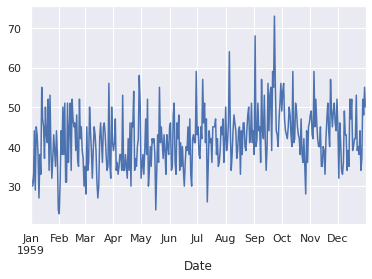

In [ ]:
series.plot()
plt.show()

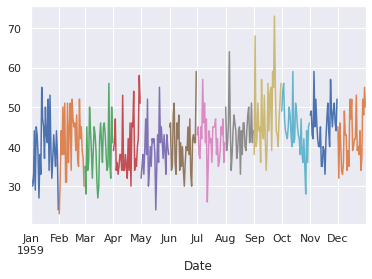

In [ ]:
groups = series.groupby(Grouper(freq='M'))
groups.plot()
plt.show()

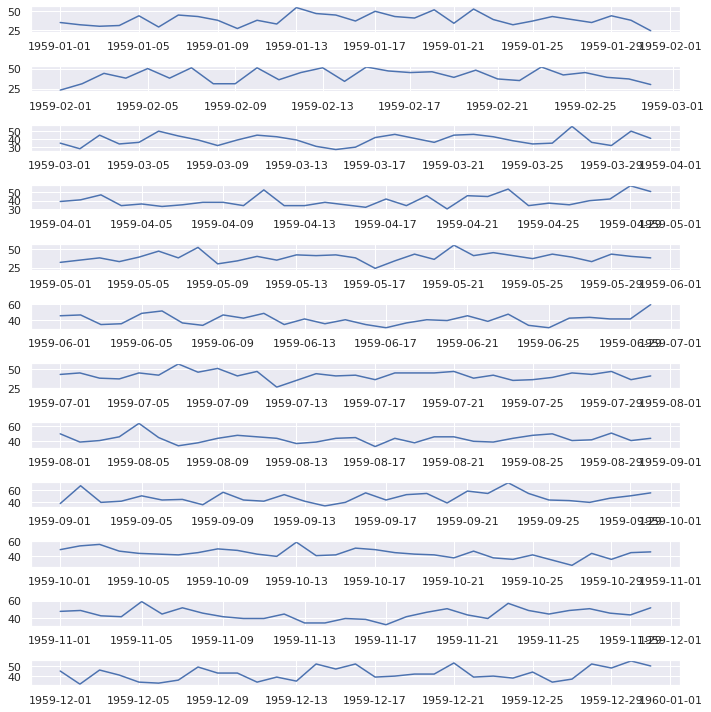

In [ ]:
groups = series.groupby(Grouper(freq='M'))
n_groups = len(groups)
fig, axs = plt.subplots(n_groups,figsize=(10,10))
i=0
for name, group in groups:
  axs[i].plot(group)
  i+=1
plt.tight_layout()
plt.show()

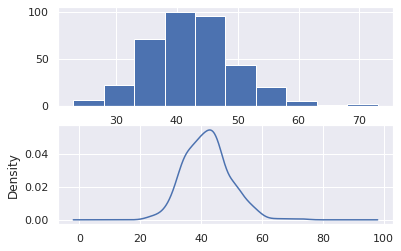

In [ ]:
plt.figure(1)
plt.subplot(211)
series.hist()
plt.subplot(212)
series.plot(kind='kde')
plt.show()

In [ ]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [ ]:
series.resample('M').mean()

Date
1959-01-31    39.129032
1959-02-28    41.000000
1959-03-31    39.290323
1959-04-30    39.833333
1959-05-31    38.967742
1959-06-30    40.400000
1959-07-31    41.935484
1959-08-31    43.580645
1959-09-30    48.200000
1959-10-31    44.129032
1959-11-30    45.000000
1959-12-31    42.387097
Freq: M, Name: Births, dtype: float64

In [ ]:
series.resample('D').mean()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Freq: D, Name: Births, Length: 365, dtype: int64

    1     2   3     4   5     6   7   8     9   10    11  12
0   35  23.0  35  39.0  32  45.0  43  50  38.0  49  48.0  45
1   32  31.0  28  41.0  35  46.0  45  39  68.0  54  49.0  32
2   30  44.0  45  47.0  38  34.0  38  41  40.0  56  43.0  46
3   31  38.0  34  34.0  33  35.0  37  46  42.0  47  42.0  41
4   44  50.0  36  36.0  39  48.0  45  64  51.0  44  59.0  34
5   29  38.0  50  33.0  47  51.0  42  45  44.0  43  45.0  33
6   45  51.0  44  35.0  38  36.0  57  34  45.0  42  52.0  36
7   43  31.0  39  38.0  52  33.0  46  38  36.0  45  46.0  49
8   38  31.0  32  38.0  30  46.0  51  44  57.0  50  42.0  43
9   27  51.0  39  34.0  34  42.0  41  48  44.0  48  40.0  43
10  38  36.0  45  53.0  40  48.0  47  46  42.0  43  40.0  34
11  33  45.0  43  34.0  35  34.0  26  44  53.0  40  45.0  39
12  55  51.0  39  34.0  42  41.0  35  37  42.0  59  35.0  35
13  47  34.0  31  38.0  41  35.0  44  39  34.0  41  35.0  52
14  45  52.0  27  35.0  42  40.0  41  44  40.0  42  40.0  47
15  37  47.0  30  32.0  

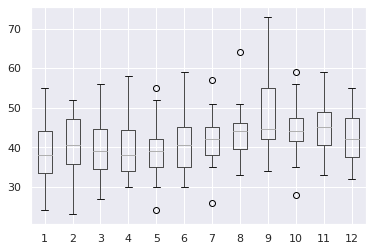

In [ ]:
groups = series.groupby(Grouper(freq='M'))
months = DataFrame()
names=[]
for name, group in groups:
  names.append(name.month)
  values=pd.DataFrame(group).reset_index(drop=True)
  months=pd.concat([months,values],axis=1)
months.columns=names
print(months)
months.boxplot()
plt.show()

## Train test split

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
series=pd.read_csv(path, header=0, index_col=0, parse_dates=True, squeeze=True)

train_size = int(len(series) * 0.7)
dataset, validation = series[0:train_size], series[train_size:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

print(series.shape)
series

Dataset 255, Validation 110
(365,)


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [ ]:
type(series)

pandas.core.series.Series

## Manually Configured ARIMA

In [ ]:
# create a differenced time series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return Series(diff)

In [ ]:
# check if stationary
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:


ADF Statistic: -11.978953
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


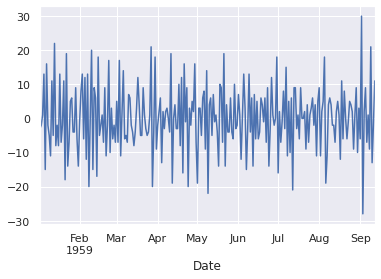

In [ ]:
# difference data
series=dataset
X = series.values
X = X.astype('float32')

# difference data
diff = 1
stationary = difference(X, diff)
stationary.index = series.index[diff:]

# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# plot differenced data
stationary.plot()
plt.show()

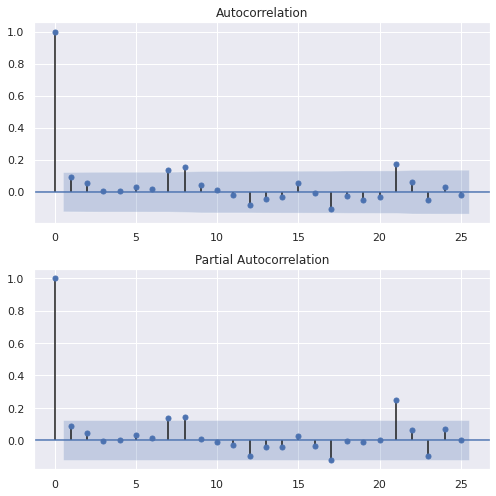

In [ ]:
plt.figure(figsize=(7,7))
plt.subplot(211)
plot_acf(series, lags=25, ax=pyplot.gca())
plt.subplot(212)
plot_pacf(series, lags=25, ax=pyplot.gca())
plt.tight_layout()
plt.show()

## Grid Search ARIMA Hyperparameters

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    model = ARIMA(diff, order=arima_order)
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# load dataset
series = dataset
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=9.985
ARIMA(0, 0, 2) RMSE=10.045
ARIMA(0, 0, 3) RMSE=10.105
ARIMA(0, 0, 4) RMSE=10.104
ARIMA(0, 1, 1) RMSE=10.131
ARIMA(0, 1, 2) RMSE=10.052
ARIMA(0, 2, 1) RMSE=13.606
ARIMA(1, 0, 0) RMSE=10.002
ARIMA(1, 0, 1) RMSE=10.061
ARIMA(1, 0, 2) RMSE=10.136
ARIMA(1, 0, 3) RMSE=10.032
ARIMA(1, 0, 4) RMSE=10.098
ARIMA(1, 1, 0) RMSE=12.154
ARIMA(1, 1, 1) RMSE=10.020
ARIMA(1, 1, 2) RMSE=10.100
ARIMA(1, 1, 3) RMSE=10.098
ARIMA(1, 1, 4) RMSE=10.106
ARIMA(1, 2, 0) RMSE=17.328
ARIMA(1, 2, 4) RMSE=10.243
ARIMA(2, 0, 0) RMSE=10.062
ARIMA(2, 0, 1) RMSE=10.192
ARIMA(2, 0, 2) RMSE=10.261
ARIMA(2, 0, 3) RMSE=10.216
ARIMA(2, 0, 4) RMSE=10.098
ARIMA(2, 1, 0) RMSE=11.910
ARIMA(2, 1, 1) RMSE=10.091
ARIMA(2, 1, 2) RMSE=10.148
ARIMA(2, 1, 3) RMSE=9.494
ARIMA(2, 1, 4) RMSE=9.660
ARIMA(2, 2, 0) RMSE=15.972
ARIMA(2, 2, 1) RMSE=11.944
ARIMA(2, 2, 4) RMSE=9.832
ARIMA(3, 0, 0) RMSE=10.061
ARIMA(3, 0, 1) RMSE=10.051
ARIMA(3, 0, 2) RMSE=9.833
ARIMA(3, 0, 3) RMSE=9.698
ARIMA(3, 0, 4) RMSE=9.967
ARIMA(3,

## Review Residual Errors

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff
# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]

RMSE: 6.712
                0
count  128.000000
mean     1.400274
std      6.590346
min    -15.537229
25%     -2.733295
50%      1.261626
75%      5.035169
max     26.323178


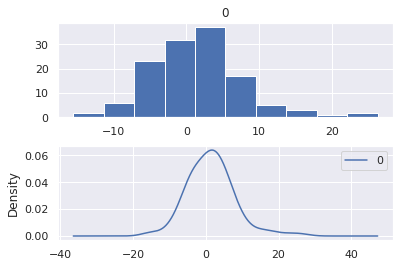

In [ ]:
# load data
series = dataset
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
  months_in_year = 1
  diff = difference(history, months_in_year)
  # predict
  model = ARIMA(diff, order=(1,0,1))
  model_fit = model.fit(trend='nc', disp=0)
  yhat = model_fit.forecast()[0]
  yhat = inverse_difference(history, yhat, months_in_year)
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure()
plt.subplot(211)
residuals.hist(ax=pyplot.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
plt.show()

## Correct with residual error

RMSE: 6.544
                0
count  128.000000
mean     0.031459
std      6.569168
min    -17.044657
25%     -4.285341
50%     -0.001906
75%      3.635245
max     24.385279


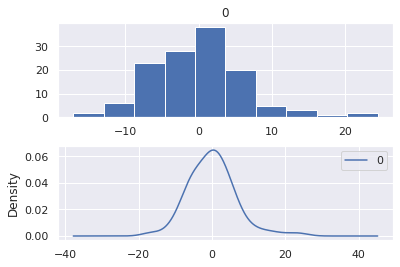

In [ ]:
# load data
series = dataset
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 1.400274
for i in range(len(test)):
  # difference data
  months_in_year = 1
  diff = difference(history, months_in_year)
  # predict
  model = ARIMA(diff, order=(0,0,1))
  model_fit = model.fit(trend='nc', disp=0)
  yhat = model_fit.forecast()[0]
  yhat = bias + inverse_difference(history, yhat, months_in_year)
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
  #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
plt.figure()
plt.subplot(211)
residuals.hist(ax=pyplot.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
plt.show()

## Model Validation

Dataset 255, Validation 110
>Predicted=40.361, Expected=42.000
RMSE: 10.706


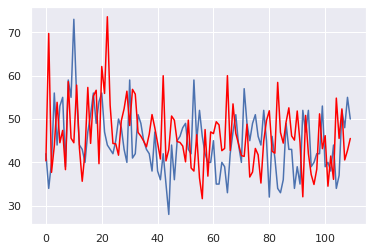

In [ ]:
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

X = dataset.values.astype('float32')
history = [x for x in X]
diff_value = 12
diff = difference(X, diff_value)

y = validation.values.astype('float32')
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)

# bias constant, could be calculated from in-sample mean residual
bias = bias

# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, diff_value)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
  # difference data
  months_in_year = 1
  diff = difference(history, diff_value)
  # predict
  model = ARIMA(diff, order=(0,0,1))
  model_fit = model.fit(trend='nc', disp=0)
  yhat = model_fit.forecast()[0]
  yhat = bias + inverse_difference(history, yhat, diff_value)
  predictions.append(yhat)
  # observation
  obs = y[i]
  history.append(obs)
  #print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()

# Try diffrent ML model

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

# Score:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
#ML normal ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.linear_model import TheilSenRegressor, HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures

#ML ensembles
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

#Special
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv'
df=pd.read_csv(path)
print(df.shape)
df.head()

(365, 2)


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
# choose a number of time steps
n_steps = 3

X, y = split_sequence(df['Births'], n_steps)
print(X.shape, y.shape)
print(X)
print(y)

(362, 3) (362,)
[[35 32 30]
 [32 30 31]
 [30 31 44]
 ...
 [34 37 52]
 [37 52 48]
 [52 48 55]]
[31 44 29 45 43 38 27 38 33 55 47 45 37 50 43 41 52 34 53 39 32 37 43 39
 35 44 38 24 23 31 44 38 50 38 51 31 31 51 36 45 51 34 52 47 45 46 39 48
 37 35 52 42 45 39 37 30 35 28 45 34 36 50 44 39 32 39 45 43 39 31 27 30
 42 46 41 36 45 46 43 38 34 35 56 36 32 50 41 39 41 47 34 36 33 35 38 38
 34 53 34 34 38 35 32 42 34 46 30 46 45 54 34 37 35 40 42 58 51 32 35 38
 33 39 47 38 52 30 34 40 35 42 41 42 38 24 34 43 36 55 41 45 41 37 43 39
 33 43 40 38 45 46 34 35 48 51 36 33 46 42 48 34 41 35 40 34 30 36 40 39
 45 38 47 33 30 42 43 41 41 59 43 45 38 37 45 42 57 46 51 41 47 26 35 44
 41 42 36 45 45 45 47 38 42 35 36 39 45 43 47 36 41 50 39 41 46 64 45 34
 38 44 48 46 44 37 39 44 45 33 44 38 46 46 40 39 44 48 50 41 42 51 41 44
 38 68 40 42 51 44 45 36 57 44 42 53 42 34 40 56 44 53 55 39 59 55 73 55
 44 43 40 47 51 56 49 54 56 47 44 43 42 45 50 48 43 40 59 41 42 51 49 45
 43 42 38 47 38 36 42 35 28 44

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, 
                                    random_state=2018)

print(X.shape)
print('X_train',X_train.shape)
print('X_test',X_test.shape)

(362, 3)
X_train (253, 3)
X_test (109, 3)


In [ ]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         #residual_threshold=5.0, 
                         random_state=0)

In [ ]:
# Creating a list of the classifiers
regression = {

    'LR':LinearRegression(),
    'LASSO':Lasso(), 
    'Ridge':Ridge(), #Boosting is more suitable
    'EN':ElasticNet(),
    'KNN':KNeighborsRegressor(),
    'CART':DecisionTreeRegressor(), #Very Long
    'SVR':SVR(),
    # New , Theil, Huber Regressor:
    'RANSAC':RANSACRegressor(),
    'TheilSen':TheilSenRegressor(),
    'Huber':HuberRegressor(),
    #New: Poly nominal
    'Poly2':Pipeline([('Poly2', PolynomialFeatures(degree=2)),
                      ('linear', LinearRegression(fit_intercept=False))]),
    
    #Ensemble:
    'AB':AdaBoostRegressor(), #Bagging (very long)
    'GBM':GradientBoostingRegressor(),  #Boosting
    'RF':RandomForestRegressor(), #Boosting
    'ET':ExtraTreesRegressor(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBRegressor(), #New Boosting
    'LGBM':LGBMRegressor(), #New Boosting   
}

In [ ]:
#Cross validate
import time
num_folds = 3
seed = 7

scoring = {'mse' : make_scorer(mean_squared_error), 
           'r2' : make_scorer(r2_score),
           }

names = []
train_rmse=[]
train_r2=[]
test_rmse=[]
test_r2=[]
fit_time=[]
time_=[]

for name, model in regression.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_rmse.append(np.sqrt(cv_results['train_mse'].mean()))
  train_r2.append(cv_results['train_r2'].mean())
  

  test_rmse.append(np.sqrt(cv_results['test_mse'].mean()))
  test_r2.append(cv_results['test_r2'].mean())
  

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_mse: %0.2f train_r2: %0.2f \
  test_mse: %0.2f test_r2: %0.2f fit_time: %0.2f" % 
       (name, cv_results['train_mse'].mean(),cv_results['train_r2'].mean(),
       cv_results['test_mse'].mean(),cv_results['test_r2'].mean(),
       cv_results['fit_time'].mean()))


LR
time : 0.013 

LR: train_mse: 49.62 train_r2: 0.07   test_mse: 53.26 test_r2: -0.01 fit_time: 0.00
LASSO
time : 0.009 

LASSO: train_mse: 49.66 train_r2: 0.07   test_mse: 53.09 test_r2: -0.00 fit_time: 0.00
Ridge
time : 0.007 

Ridge: train_mse: 49.62 train_r2: 0.07   test_mse: 53.26 test_r2: -0.01 fit_time: 0.00
EN
time : 0.007 

EN: train_mse: 49.63 train_r2: 0.07   test_mse: 53.11 test_r2: -0.00 fit_time: 0.00
KNN
time : 0.010 

KNN: train_mse: 42.14 train_r2: 0.21   test_mse: 64.75 test_r2: -0.22 fit_time: 0.00
CART
time : 0.008 

CART: train_mse: 0.00 train_r2: 1.00   test_mse: 118.32 test_r2: -1.26 fit_time: 0.00
SVR
time : 0.016 

SVR: train_mse: 49.52 train_r2: 0.07   test_mse: 54.55 test_r2: -0.02 fit_time: 0.00
RANSAC
time : 0.114 

RANSAC: train_mse: 57.75 train_r2: -0.09   test_mse: 60.42 test_r2: -0.14 fit_time: 0.04
TheilSen


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

time : 1.274 

TheilSen: train_mse: 50.12 train_r2: 0.06   test_mse: 53.46 test_r2: -0.01 fit_time: 0.42
Huber
time : 0.033 

Huber: train_mse: 49.86 train_r2: 0.07   test_mse: 53.26 test_r2: -0.01 fit_time: 0.01
Poly2
time : 0.010 

Poly2: train_mse: 47.90 train_r2: 0.10   test_mse: 56.85 test_r2: -0.08 fit_time: 0.00
AB


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


time : 0.191 

AB: train_mse: 35.72 train_r2: 0.33   test_mse: 64.13 test_r2: -0.22 fit_time: 0.06
GBM
time : 0.101 

GBM: train_mse: 18.87 train_r2: 0.64   test_mse: 71.46 test_r2: -0.36 fit_time: 0.03
RF


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


time : 0.456 

RF: train_mse: 8.82 train_r2: 0.83   test_mse: 69.48 test_r2: -0.32 fit_time: 0.13
ET


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


time : 0.334 

ET: train_mse: 0.00 train_r2: 1.00   test_mse: 70.04 test_r2: -0.32 fit_time: 0.09
XGB
[04:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
time : 0.051 

XGB: train_mse: 23.85 train_r2: 0.55   test_mse: 68.00 test_r2: -0.29 fit_time: 0.01
LGBM
time : 0.041 

LGBM: train_mse: 29.89 train_r2: 0.44   test_mse: 61.17 test_r2: -0.16 fit_time: 0.01


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
df_results_val=pd.DataFrame(list(zip(names,test_rmse,test_r2,
                                     train_rmse,train_r2,
                                     fit_time,time_)),
                  columns=['Names','test_rmse','test_r2',
                           'train_rmse','train_r2',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_rmse',ascending=True)
#df_results_val.to_csv('/content/drive/My Drive/Colab Notebooks/df_results_val.csv')
df_results_val

,Names,test_rmse,test_r2,train_rmse,train_r2,fit_time,time
1,LASSO,7.286258,-0.001333,7.047070,0.069111,0.000635,0.009271
3,EN,7.287849,-0.002276,7.045184,0.069605,0.000477,0.007430
2,Ridge,7.298031,-0.005759,7.044098,0.069890,0.000483,0.006922
0,LR,7.298063,-0.005769,7.044098,0.069890,0.001008,0.012856
9,Huber,7.298087,-0.005556,7.061508,0.065325,0.008679,0.032663
8,TheilSen,7.311723,-0.008423,7.079647,0.060774,0.422269,1.274014
6,SVR,7.385586,-0.024803,7.036772,0.072126,0.002336,0.015778
10,Poly2,7.540074,-0.076255,6.920822,0.101778,0.000795,0.010397
7,RANSAC,7.772722,-0.141669,7.599020,-0.085107,0.036103,0.114397
16,LGBM,7.821266,-0.156705,5.467378,0.438997,0.009592,0.040778


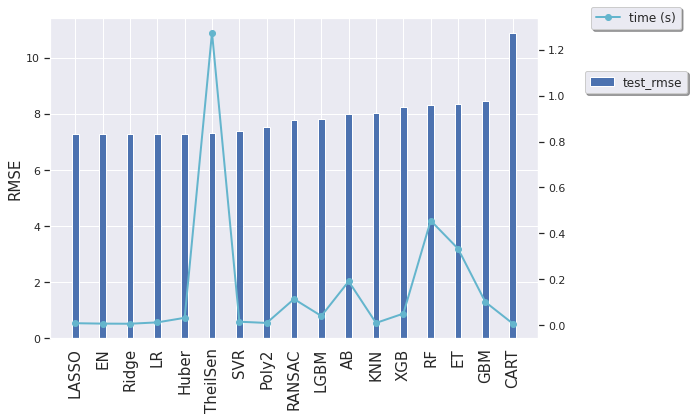

In [ ]:
# Define name:
name=df_results_val['Names']
test_rmse=df_results_val['test_rmse']
#test_r2=df_results_val['test_r2']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_rmse, color = 'b', width = 0.25,label='test_rmse')
#rects2 = ax.plot(x, test_r2, color = 'g',marker='o',label='test_r2')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15,rotation=90)
ax.set_ylabel('RMSE',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(1.2, 0.8),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(1.2,1),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

In [ ]:
model=Lasso()
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('train rmse:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('test rmse:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

train rmse: 7.090623910058917
test rmse: 7.145386344994726


# Explain return_sequence and return states (outside)

https://www.dlology.com/blog/how-to-use-return_state-or-return_sequences-in-keras/#:~:text=Return%20sequences%20refer%20to%20return,representation%20of%20the%20input%20sequence.

Return sequences

Return sequences refer to return the hidden state a<t>. By default, the return_sequences is set to False in Keras RNN layers, and this means the RNN layer will only return the last hidden state output a<T>. The last hidden state output captures an abstract representation of the input sequence. In some case, it is all we need, such as a classification or regression model where the RNN is followed by the Dense layer(s) to generate logits for news topic classification or score for sentiment analysis, or in a generative model to produce the softmax probabilities for the next possible char.

In other cases, we need the full sequence as the output. Setting return_sequences to True is necessary.

Let's define a Keras model consists of only an LSTM layer. Use constant initializers so that the output results are reproducible for the demo purpose.

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
import keras
k_init = keras.initializers.Constant(value=0.1)
b_init = keras.initializers.Constant(value=0)
r_init = keras.initializers.Constant(value=0.1)
# LSTM units
units = 1

# define model
inputs1 = Input(shape=(3, 2))
lstm1 = LSTM(units, return_sequences=True, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3, 0.1, 0.2, 0.3]).reshape((1,3,2))
# make and show prediction
output = model.predict(data)
print(output)
print(output.shape)

[[[0.00772376]
  [0.01633997]
  [0.02572775]]]
(1, 3, 1)


In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3, 2)              0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 1)              16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data

array([[[0.1, 0.2],
        [0.3, 0.1],
        [0.2, 0.3]]])

We can see the output array's shape of the LSTM layer is (1,3,1) which stands for (#Samples, #Time steps, #LSTM units). Compared to when return_sequences is set to False, the shape will be (#Samples, #LSTM units), which only returns the last time step hidden state.

In [ ]:
# define model
inputs1 = Input(shape=(3, 2))
lstm1 = LSTM(units, kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3, 0.1, 0.2, 0.3]).reshape((1,3,2))
# make and show prediction
preds = model.predict(data)
print(preds, preds.shape)

[[0.02572775]] (1, 1)


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3, 2)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1)                 16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data

array([[[0.1, 0.2],
        [0.3, 0.1],
        [0.2, 0.3]]])

https://machinelearningmastery.com/return-sequences-and-return-states-for-lstms-in-keras/

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
print(data)
# make and show prediction
print(model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]]
[[-0.10759691]]


Running the example outputs a single hidden state for the input sequence with 3 time steps.

Your specific output value will differ given the random initialization of the LSTM weights and cell state.

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1 = LSTM(1, return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(data)
print(model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]]
[[[0.00092163]
  [0.00268103]
  [0.00520983]]]


### Explain return states (outside)

The output of an LSTM cell or layer of cells is called the hidden state.

This is confusing, because each LSTM cell retains an internal state that is not output, called the cell state, or c.

Generally, we do not need to access the cell state unless we are developing sophisticated models where subsequent layers may need to have their cell state initialized with the final cell state of another layer, such as in an encoder-decoder model.

Keras provides the return_state argument to the LSTM layer that will provide access to the hidden state output (state_h) and the cell state (state_c). For example:

We can demonstrate access to the hidden and cell states of the cells in the LSTM layer with a worked example listed below.

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(data)
print(model.predict(data))

[[[0.1]
  [0.2]
  [0.3]]]
[array([[-0.10761876]], dtype=float32), array([[-0.10761876]], dtype=float32), array([[-0.24770269]], dtype=float32)]


The LSTM hidden state output for the last time step.

The LSTM hidden state output for the last time step (again).

The LSTM cell state for the last time step.



In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from numpy import array
# define model
inputs1 = Input(shape=(3, 1))
lstm1, state_h, state_c = LSTM(1, return_sequences=True, return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=[lstm1, state_h, state_c])
# define input data
data = array([0.1, 0.2, 0.3]).reshape((1,3,1))
# make and show prediction
print(model.summary())
print(data)
print(model.predict(data))

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3, 1)              0         
_________________________________________________________________
lstm_9 (LSTM)                [(None, 3, 1), (None, 1), 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None
[[[0.1]
  [0.2]
  [0.3]]]
[array([[[-0.01134042],
        [-0.03141383],
        [-0.05804285]]], dtype=float32), array([[-0.05804285]], dtype=float32), array([[-0.1168792]], dtype=float32)]


# How to use the time distributed layer in Keras

## One-to-One LSTM for Sequence Prediction

Tips for LSTM Input
This section lists some tips to help you when preparing your input data for LSTMs.

- The LSTM input layer must be 3D.
- The meaning of the 3 input dimensions are: samples, time steps, and features.
- The LSTM input layer is defined by the input_shape argument on the first hidden layer.
- The input_shape argument takes a tuple of two values that define the number of time steps and features.
- The number of samples is assumed to be 1 or more.
- The reshape() function on NumPy arrays can be used to reshape your 1D or 2D data to be 3D.
- The reshape() function takes a tuple as an argument that defines the new shape.

Summary (options)
- The input of the LSTM is always is a 3D array. (batch_size, time_steps, seq_len)
- The output of the LSTM could be a 2D array or 3D array depending upon the return_sequences argument.
- If return_sequence is False, the output is a 2D array. (batch_size, units)
- If return_sequence is True, the output is a 3D array. (batch_size, time_steps, units)

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
seq

Using TensorFlow backend.


array([0. , 0.2, 0.4, 0.6, 0.8])

The input for LSTMs must be three dimensional. We can reshape the 2D sequence into a 3D sequence with 5 samples, 1 time step, and 1 feature. We will define the output as 5 samples with 1 feature.

In [ ]:
X = seq.reshape(len(seq), 1, 1)
y = seq.reshape(len(seq), 1)
print(X.shape)
print(y.shape)
print(X)
print(y)

(5, 1, 1)
(5, 1)
[[[0. ]]

 [[0.2]]

 [[0.4]]

 [[0.6]]

 [[0.8]]]
[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]]


If you will be feeding data 1 character at a time your input shape should be (31,1) since your input has 31 timesteps, 1 character each. You will need to reshape your x_train from (1085420, 31) to (1085420, 31,1) which is easily done with this command :

In [ ]:
# define LSTM configuration
n_neurons = length # 5 samples
n_batch = length # 5 samples
n_epoch = 1000
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None


We can see that the LSTM layer has 140 parameters. This is calculated based on the number of inputs (1) and the number of outputs (5 for the 5 units in the hidden layer), as follows:

n = 4 * ((inputs + 1) * outputs + outputs^2)

n = 4 * ((1 + 1) * 5 + 5^2)

n = 4 * 35

n = 140

We can also see that the fully connected layer only has 6 parameters for the number of inputs (5 for the 5 inputs from the previous layer), number of outputs (1 for the 1 neuron in the layer), and the bias.

n = inputs * outputs + outputs

n = 5 * 1 + 1

n = 6

In [ ]:
# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=0)

In [ ]:
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result:
	print('%.1f' % value)

0.0
0.2
0.4
0.6
0.8


## Many-to-One LSTM for Sequence Prediction (without  TimeDistributed)

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(1, length, 1)
y = seq.reshape(1, length)
print(X.shape)
print(y.shape)
print(X)
print(y)

(1, 5, 1)
(1, 5)
[[[0. ]
  [0.2]
  [0.4]
  [0.6]
  [0.8]]]
[[0.  0.2 0.4 0.6 0.8]]


In [ ]:
# define LSTM configuration
n_neurons = length #5
n_batch = 1
n_epoch = 500
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(length, 1))) # (5,1) instead (1,1) as above
model.add(Dense(length)) # 5 instead 1 as above
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________
None


We can see that the LSTM layer has 140 parameters as in the previous section.

We can see that the fully connected output layer has 5 inputs and is expected to output 5 values. We can account for the 30 weights to be learned as follows:

n = inputs * outputs + outputs

n = 5 * 5 + 5

n = 30


In [ ]:
# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=0)

In [ ]:
# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:]:
	print('%.1f' % value)

-0.0
0.2
0.4
0.6
0.8


## Many-to-Many LSTM for Sequence Prediction (with TimeDistributed)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import LSTM
# prepare sequence
length = 5
seq = array([i/float(length) for i in range(length)])
X = seq.reshape(1, length, 1)
y = seq.reshape(1, length, 1)
print(X.shape)
print(y.shape)
print(X)
print(y)

(1, 5, 1)
(1, 5, 1)
[[[0. ]
  [0.2]
  [0.4]
  [0.6]
  [0.8]]]
[[[0. ]
  [0.2]
  [0.4]
  [0.6]
  [0.8]]]


The single output value in the output layer is key. It highlights that we intend to output one time step from the sequence for each time step in the input. It just so happens that we will process 5 time steps of the input sequence at a time.

The TimeDistributed achieves this trick by applying the same Dense layer (same weights) to the LSTMs outputs for one time step at a time. In this way, the output layer only needs one connection to each LSTM unit (plus one bias).

For this reason, the number of training epochs needs to be increased to account for the smaller network capacity. I doubled it from 500 to 1000 to match the first one-to-one example.

In [ ]:
# define LSTM configuration
n_neurons = length
n_batch = 1
n_epoch = 1000
# create LSTM
model = Sequential()
model.add(LSTM(n_neurons, input_shape=(length, 1), return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 5, 1)              6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________
None


This does two important things:

- Allows the problem to be framed and learned as it was defined, that is one input to one output, keeping the internal process for each time step separate.
- Simplifies the network by requiring far fewer weights such that only one time step is processed at a time.

The one simpler fully connected layer is applied to each time step in the sequence provided from the previous layer to build up the output sequence.

In [ ]:
# train LSTM
model.fit(X, y, epochs=n_epoch, batch_size=n_batch, verbose=0)

# evaluate
result = model.predict(X, batch_size=n_batch, verbose=0)
for value in result[0,:,0]:
	print('%.1f' % value)

0.0
0.2
0.4
0.6
0.8


# Solving Sequence Problems with LSTM in Keras

https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras/

- One-to-One: Where there is one input and one output. Typical example of a one-to-one sequence problems is the case where you have an image and you want to predict a single label for the image.
- Many-to-One: In many-to-one sequence problems, we have a sequence of data as input and we have to predict a single output. Text classification is a prime example of many-to-one sequence problems where we have an input sequence of words and we want to predict a single output tag.
- One-to-Many: In one-to-many sequence problems, we have single input and a sequence of outputs. A typical example is an image and its corresponding description.
- Many-to-Many: Many-to-many sequence problems involve a sequence input and a sequence output. For instance, stock prices of 7 days as input and stock prices of next 7 days as outputs. Chatbots are also an example of many-to-many sequence problems where a text sequence is an input and another text sequence is the output.

## One-to-One Sequence Problems

### One-to-One Sequence Problems with a Single Feature

Input: one timestep, one feature. Output: one feature

In [1]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras.utils.vis_utils import plot_model

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
X = list()
Y = list()
X = [x+1 for x in range(20)]
Y = [y * 15 for y in X]
print(len(X))
print(len(Y))

print(X)
print(Y)

20
20
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300]


The input to LSTM layer should be in 3D shape i.e. (samples, time-steps, features). The samples are the number of samples in the input data. We have 20 samples in the input. The time-steps is the number of time-steps per sample. We have 1 time-step. Finally, features correspond to the number of features per time-step. We have one feature per time-step.

In [ ]:
X = array(X).reshape(20, 1, 1) # 20 samples, 1 timestep, 1 feature
X.shape

(20, 1, 1)

In [ ]:
len(Y)

20

In the script above, we create an LSTM model with one LSTM layer of 50 neurons and relu activation functions. You can see the input shape is (1,1) since our data has one time-step with one feature. Executing the above script prints the following summary:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None


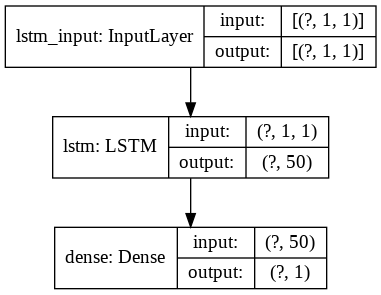

In [2]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1))) # 1 timestep, 1 feature
#model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=10,verbose=0)

We train our model for 2000 epochs with a batch size of 5. You can choose any number. Once the model is trained, we can make predictions on a new instance.

Let's say we want to predict the output for an input of 30. The actual output should be 30 x 15 = 450. Let's see what value do we get. First, we need to convert our test data to the right shape i.e. 3D shape, as expected by LSTM. The following script predicts the output for the number 30:

In [ ]:
test_input = array([30])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[434.2213]]


Solution via Stacked LSTM

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


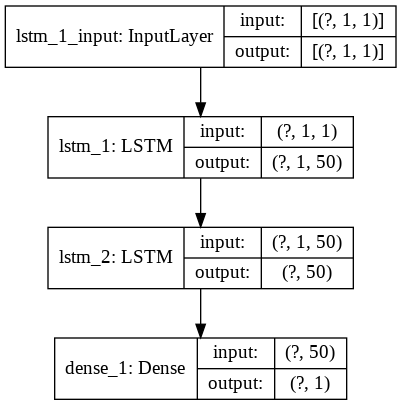

In [3]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In the above model, we have two LSTM layers. Notice, the first LSTM layer has parameter return_sequences, which is set to True. When the return sequence is set to True, the output of the hidden state of each neuron is used as an input to the next LSTM layer. The summary of the above model is as follows:

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=10,verbose=0)

In [ ]:
test_input = array([30])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[443.4099]]


Result is 443 is better than 434 , but not the same as 450

### One-to-One Sequence Problems with Multiple Features

In the last section, each input sample had one time-step, where each time-step had one feature. In this section we will see how to solve one-to-one sequence problem where input time-steps have multiple features.

In [ ]:
nums = 25

X1 = list()
X2 = list()
X = list()
Y = list()

X1 = [(x+1)*2 for x in range(25)]
X2 = [(x+1)*3 for x in range(25)]
Y = [x1*x2 for x1,x2 in zip(X1,X2)]

print(len(X1))
print(len(Y))
print(X1)
print(X2)
print(Y)

25
25
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75]
[6, 24, 54, 96, 150, 216, 294, 384, 486, 600, 726, 864, 1014, 1176, 1350, 1536, 1734, 1944, 2166, 2400, 2646, 2904, 3174, 3456, 3750]


Each element in the output list, is basically the product of the corresponding elements in the X1 and X2 lists. For instance, the second element in the output list is 24, which is the product of the second element in list X1 i.e. 4, and the second element in the list X2 i.e. 6.

The input will consist of the combination of X1 and X2 lists, where each list will be represented as a column. The following script creates the final input:

In [ ]:
X = np.column_stack((X1, X2))
print(X.shape)
print(X)

(25, 2)
[[ 2  3]
 [ 4  6]
 [ 6  9]
 [ 8 12]
 [10 15]
 [12 18]
 [14 21]
 [16 24]
 [18 27]
 [20 30]
 [22 33]
 [24 36]
 [26 39]
 [28 42]
 [30 45]
 [32 48]
 [34 51]
 [36 54]
 [38 57]
 [40 60]
 [42 63]
 [44 66]
 [46 69]
 [48 72]
 [50 75]]


Here the X variable contains our final feature set. You can see it contains two columns i.e. two features per input. As we discussed earlier, we need to convert the input into 3-dimensional shape. Our input has 25 samples, where each sample consist of 1 time-step and each time-step consists of 2 features. The following script reshapes the input.

In [ ]:
X = array(X).reshape(25, 1, 2)
print(X.shape)


(25, 1, 2)


1. Solution via Simple LSTM

We are now ready to train our LSTM models. Let's first develop a single LSTM layer model as we did in the previous section:

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 80)                26560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                810       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 27,381
Trainable params: 27,381
Non-trainable params: 0
_________________________________________________________________
None


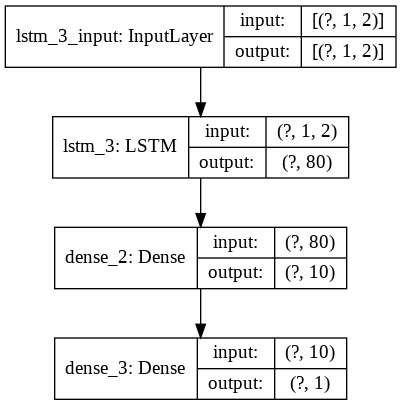

In [4]:
model = Sequential()
model.add(LSTM(80, activation='relu', input_shape=(1, 2))) #1 timestep, 2 features
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

Here our LSTM layer contains 80 neurons. We have two dense layers where first layer contains 10 neurons and the second dense layer, which also acts as the output layer, contains 1 neuron. The summary of the model is as follows:

Let's test our trained model on a new data point. Our data point will have two features i.e. (55,80) the actual output should be 55 x 80 = 4400. Let's see what our algorithm predicts. Execute the following script:

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=10,verbose=0)
test_input = array([55,80])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[3694.757]]


2. add return sequence = True (jsut trial - error)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 80)             26560     
_________________________________________________________________
dense_4 (Dense)              (None, 1, 10)             810       
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1)              11        
Total params: 27,381
Trainable params: 27,381
Non-trainable params: 0
_________________________________________________________________
None


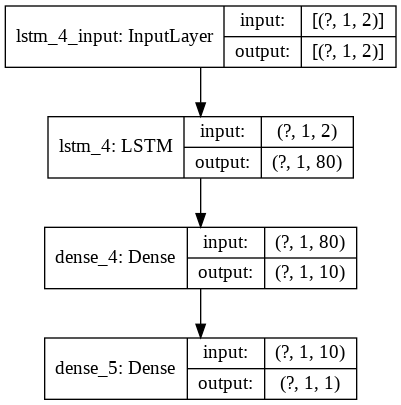

In [5]:
model = Sequential()
model.add(LSTM(80, activation='relu',return_sequences=True, input_shape=(1, 2))) #1 timestep, 2 features
model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=10,verbose=0)
test_input = array([55,80])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

3. Solution via Stacked LSTM

Let's now create a more complex LSTM with multiple LSTM and dense layers and see if we can improve our answer:

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 200)            162400    
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 100)            120400    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

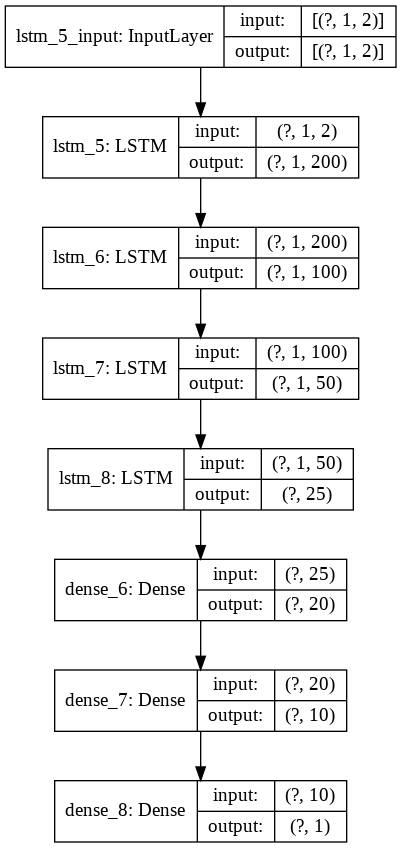

In [6]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(1, 2))) # 1 timestep, 2 features
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

To improve the accuracy, we will reduce the batch size, and since our model is more complex now we can also reduce the number of epochs. The following script trains the LSTM model and makes prediction on the test datapoint.

In [ ]:
test_input = array([55,80])
test_input = test_input.reshape((1, 1, 2))

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.1, verbose=0, batch_size=3)

test_output = model.predict(test_input, verbose=0)
print(test_output)

[[4051.1387]]


In the output, I got a value of 4051 which is still less than 4400, but is much better than the previously obtained value of 3694.44 using single LSTM layer. You can play with different combination of LSTM layers, dense layers, batch size and the number of epochs to see if you get better results.

## Many-to-One Sequence Problems

In the previous sections we saw how to solve one-to-one sequence problems with LSTM. In a one-to-one sequence problem, each sample consists of single time-step of one or multiple features. Data with single time-step cannot be considered sequence data in a real sense. Densely connected neural networks have been proven to perform better with single time-step data.

Real sequence data consists of multiple time-steps, such as stock market prices of past 7 days, a sentence containing multiple words, and so on.

In this section, we will see how to solve many-to-one sequence problems. In many-to-one sequence problems, each input sample has more than one time-step, however the output consists of a single element. Each time-step in the input can have one or more features. We will start with many-to-one sequence problems having one feature, and then we will see how to solve many-to-one problems where input time-steps have multiple features.

### Many-to-One Sequence Problems with a Single Feature input

In [ ]:
X = np.array([x+1 for x in range(45)])
print(len(X))
print(X)

45
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


We can reshape it into number of samples, time-steps and features using the following function:

In [ ]:
X = X.reshape(15,3,1)
print(X.shape)
print(X)
# The above script converts the list X into 3-dimensional shape with 15 samples, 
#3 time-steps, and 1 feature. The script above also prints the reshaped data.

(15, 3, 1)
[[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]


In [ ]:
Y = list()
for x in X:
    Y.append(x.sum())

Y = np.array(Y)
print(Y)

[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


Solution via Simple LSTM

Let's now create our model with one LSTM layer.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


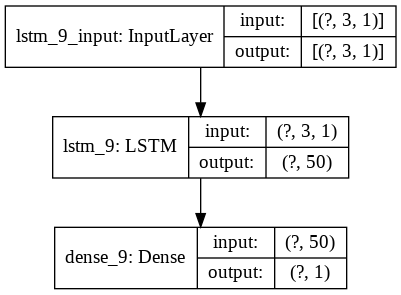

In [7]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1))) # 3 timesteps, 1 feature
model.add(Dense(1)) # one timestep
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)

Once the model is trained, we can use it to make predictions on the test data points. Let's predict the output for the number sequence 50,51,52. The actual output should be 50 + 51 + 52 = 153. The following script converts our test points into a 3-dimensional shape and then predicts the output:

In [ ]:
test_input = array([50,51,52])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[153.10216]]


Solution via Stacked LSTM

Let's now create a complex LSTM model with multiple layers and see if we can get better results. Execute the following script to create and train a complex model with multiple LSTM and dense layers:

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 3, 200)            161600    
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 100)            120400    
_________________________________________________________________
lstm_12 (LSTM)               (None, 3, 50)             30200     
_________________________________________________________________
lstm_13 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_10 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

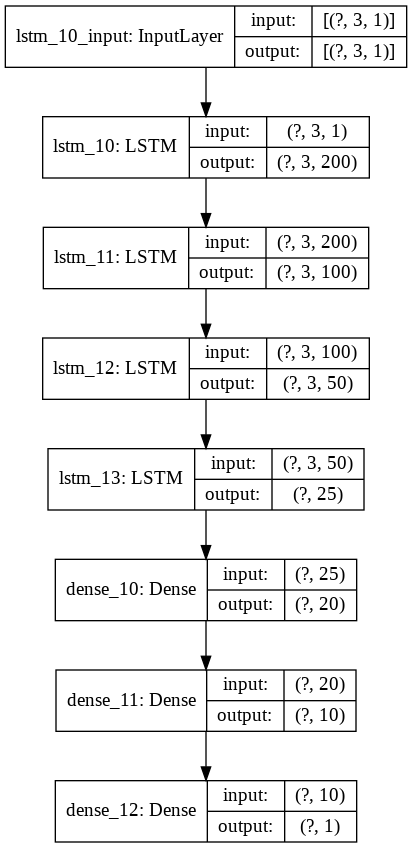

In [8]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[150.59567]]


Solution via Bidirectional LSTM

Bidirectional LSTM is a type of LSTM which learns from the input sequence from both forward and backward directions. The final sequence interpretation is the concatenation of both forward and backward learning passes. Let's see if we can get better results with bidirectional LSTMs.

The following script creates a bidirectional LSTM model with one bidirectional layer and one dense layer which acts as the output of the model.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 100)               20800     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 20,901
Trainable params: 20,901
Non-trainable params: 0
_________________________________________________________________


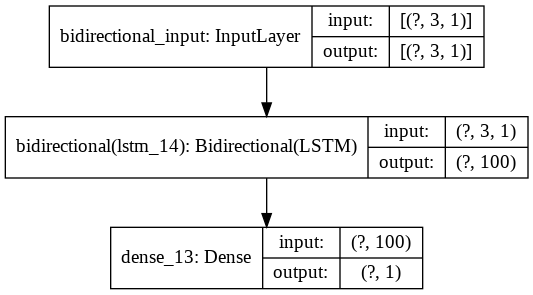

In [9]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

The following script trains the model and makes predictions on the test sequence which is 50, 51, and 52.

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[153.5176]]


### Many-to-one Sequence Problems with Multiple Features input

In a many-to-one sequence problem we have an input where each time-steps consists of multiple features. The output can be a single value or multiple values, one per feature in the input time step. We will cover both the cases in this section.

In [ ]:
X1 = np.array([x+3 for x in range(0, 135, 3)])
print(X1)

X2 = np.array([x+5 for x in range(0, 225, 5)])
print(X2)

[  3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54
  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105 108
 111 114 117 120 123 126 129 132 135]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200 205 210 215 220 225]


In [ ]:
X = np.column_stack((X1, X2))
print(X.shape)
print(X)

(45, 2)
[[  3   5]
 [  6  10]
 [  9  15]
 [ 12  20]
 [ 15  25]
 [ 18  30]
 [ 21  35]
 [ 24  40]
 [ 27  45]
 [ 30  50]
 [ 33  55]
 [ 36  60]
 [ 39  65]
 [ 42  70]
 [ 45  75]
 [ 48  80]
 [ 51  85]
 [ 54  90]
 [ 57  95]
 [ 60 100]
 [ 63 105]
 [ 66 110]
 [ 69 115]
 [ 72 120]
 [ 75 125]
 [ 78 130]
 [ 81 135]
 [ 84 140]
 [ 87 145]
 [ 90 150]
 [ 93 155]
 [ 96 160]
 [ 99 165]
 [102 170]
 [105 175]
 [108 180]
 [111 185]
 [114 190]
 [117 195]
 [120 200]
 [123 205]
 [126 210]
 [129 215]
 [132 220]
 [135 225]]


We need to reshape our data into three dimensions so that it can be used by LSTM. We have 45 rows in total and two columns in our dataset. We will reshape our dataset into 15 samples, 3 time-steps, and two features.

In [ ]:
X = array(X).reshape(15, 3, 2)
print(X)

[[[  3   5]
  [  6  10]
  [  9  15]]

 [[ 12  20]
  [ 15  25]
  [ 18  30]]

 [[ 21  35]
  [ 24  40]
  [ 27  45]]

 [[ 30  50]
  [ 33  55]
  [ 36  60]]

 [[ 39  65]
  [ 42  70]
  [ 45  75]]

 [[ 48  80]
  [ 51  85]
  [ 54  90]]

 [[ 57  95]
  [ 60 100]
  [ 63 105]]

 [[ 66 110]
  [ 69 115]
  [ 72 120]]

 [[ 75 125]
  [ 78 130]
  [ 81 135]]

 [[ 84 140]
  [ 87 145]
  [ 90 150]]

 [[ 93 155]
  [ 96 160]
  [ 99 165]]

 [[102 170]
  [105 175]
  [108 180]]

 [[111 185]
  [114 190]
  [117 195]]

 [[120 200]
  [123 205]
  [126 210]]

 [[129 215]
  [132 220]
  [135 225]]]


The output will also have 15 values corresponding to 15 input samples. Each value in the output will be the sum of the two feature values in the third time-step of each input sample. For instance, the third time-step of the first sample have features 9 and 15, hence the output will be 24. Similarly, the two feature values in the third time-step of the 2nd sample are 18 and 30; the corresponding output will be 48, and so on.

In [ ]:
X.shape

(15, 3, 2)

In [ ]:
for sample in X:
  print(sample[2][0],sample[2][1])


9 15
18 30
27 45
36 60
45 75
54 90
63 105
72 120
81 135
90 150
99 165
108 180
117 195
126 210
135 225


In [ ]:
Y = np.array([sample[2][0] + sample[2][1]for sample in X])
print(len(Y))
print(Y)

15
[ 24  48  72  96 120 144 168 192 216 240 264 288 312 336 360]


Solution via Simple LSTM

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 50)                10600     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


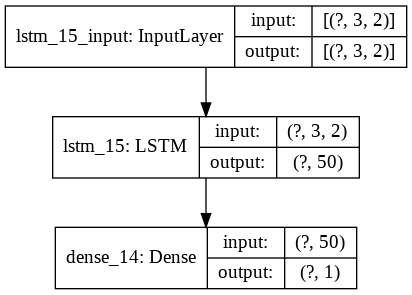

In [10]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 2))) # 3 timestep, 2 features
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)

In [ ]:
test_input = array([[8, 51],
                    [11,56],
                    [14,61]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[84.49603]]


The sum of two features of the third time-step of the input is 14 + 61 = 75. Our model with one LSTM layer predicted 84, which is pretty close.

Solution via Stacked LSTM

The following script trains a stacked LSTM and makes predictions on test point:

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 3, 200)            162400    
_________________________________________________________________
lstm_17 (LSTM)               (None, 3, 100)            120400    
_________________________________________________________________
lstm_18 (LSTM)               (None, 3, 50)             30200     
_________________________________________________________________
lstm_19 (LSTM)               (None, 25)                7600      
_________________________________________________________________
dense_15 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

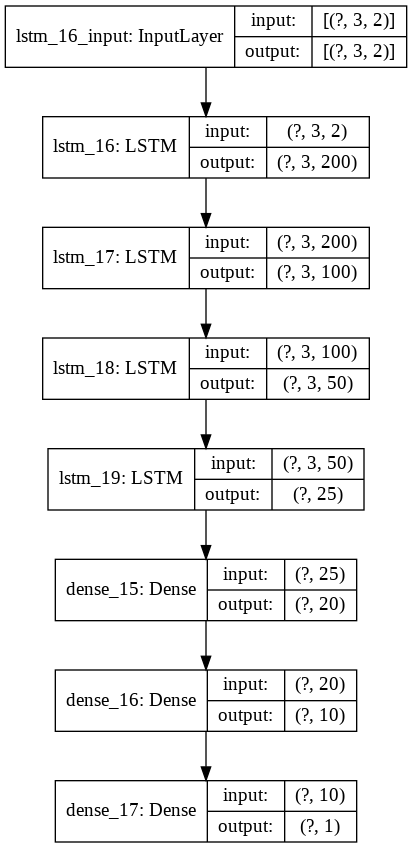

In [11]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(3, 2)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)

test_output = model.predict(test_input, verbose=0)
print(test_output)

[[79.80178]]


The sum of two features of the third time-step of the input is 14 + 61 = 75. Our model with one LSTM layer predicted 79, which is pretty close.

Solution via Bidirectional LSTM

Here is the training script for simple bidirectional LSTM along with code that is used to make predictions on the test data point:

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 100)               21200     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 21,301
Trainable params: 21,301
Non-trainable params: 0
_________________________________________________________________


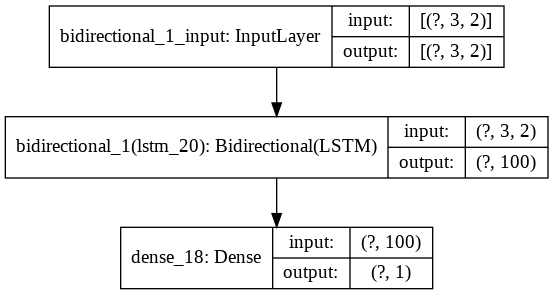

In [12]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 2)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[70.36163]]


Again, bidirectional LSTM seems to be outperforming the rest of the algorithms.

### Many to one (output with 2 features)

In [ ]:
Y = list()
for x in X:
    new_item = list()
    new_item.append(x[2][0]+3)
    new_item.append(x[2][1]+5)
    Y.append(new_item)

Y = np.array(Y)
print(Y.shape)
print(Y)

(15, 2)
[[ 12  20]
 [ 21  35]
 [ 30  50]
 [ 39  65]
 [ 48  80]
 [ 57  95]
 [ 66 110]
 [ 75 125]
 [ 84 140]
 [ 93 155]
 [102 170]
 [111 185]
 [120 200]
 [129 215]
 [138 230]]


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 50)                10600     
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 102       
Total params: 10,702
Trainable params: 10,702
Non-trainable params: 0
_________________________________________________________________


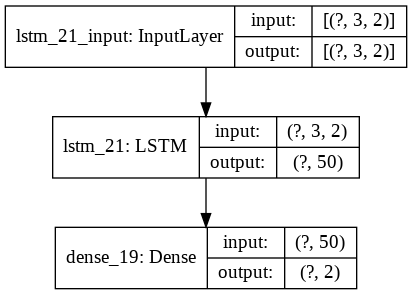

In [13]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 2))) # 3 timesteps, 2 features
model.add(Dense(2)) # 2 features outputs
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)

In [ ]:
test_input = array([[20,34],
                    [23,39],
                    [26,44]])

test_input = test_input.reshape((1, 3, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[28.875631 48.465828]]


The actual output is [29, 45]. Our model predicts [28.089157, 48.469097], which is pretty close.

Finally, we can train our bidirectional LSTM and make prediction on the test point:

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 100)               21200     
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 202       
Total params: 21,402
Trainable params: 21,402
Non-trainable params: 0
_________________________________________________________________


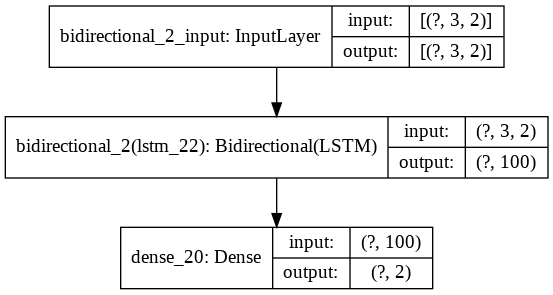

In [14]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(3, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0)
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[29.308392 48.550774]]


## One-to-Many Sequence Problems

One-to-many sequence problems are the type of sequence problems where input data has one time-step and the output contains a vector of multiple values or multiple time-steps. In this section, we will see how to solve one-to-many sequence problems where the input has a single feature. We will then move on to see how to work with multiple features input to solve one-to-many sequence problems.

### One-to-Many Sequence Problems with a Single Feature

Let's first create a dataset and understand the problem that we are going to solve in this section.

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
X = list()
Y = list()
X = [x+3 for x in range(-2, 43, 3)]

for i in X:
    output_vector = list()
    output_vector.append(i+1)
    output_vector.append(i+2)
    Y.append(output_vector)

print(len(X))
print(len(Y))
print(X)
print(Y)

15
15
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
[[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]


Our input contains 15 samples with one time-step and one feature value. For each value in the input sample, the corresponding output vector contains the next two integers. For instance, if the input is 4, the output vector will contain values 5 and 6. Hence, the problem is a simple one-to-many sequence problem.

In [ ]:
X = np.array(X).reshape(15, 1, 1)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
print(X[:3])
print(Y[:3])

(15, 1, 1)
(15, 2)
[[[1]]

 [[4]]

 [[7]]]
[[2 3]
 [5 6]
 [8 9]]


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 102       
Total params: 10,502
Trainable params: 10,502
Non-trainable params: 0
_________________________________________________________________
None


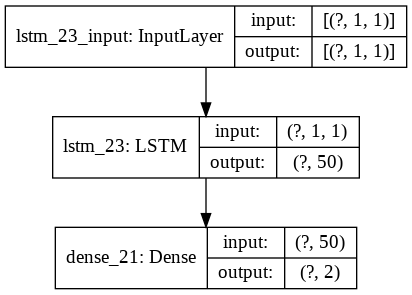

In [15]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1))) # 1 timestep, 1 feature
model.add(Dense(2)) # 2 output timesteps
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=3,verbose=0)

In [ ]:
test_input = array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[11.036312 12.132651]]


The test data contains a value 10. In the output, we should get a vector containing 11 and 12. The output I received is [11.082891 12.109697] which is actually very close to the expected output.

Solution via Stacked LSTM

The following script trains stacked LSTMs on our data and makes prediction on the test points:

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 1, 50)             10400     
_________________________________________________________________
lstm_25 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 102       
Total params: 30,702
Trainable params: 30,702
Non-trainable params: 0
_________________________________________________________________
None


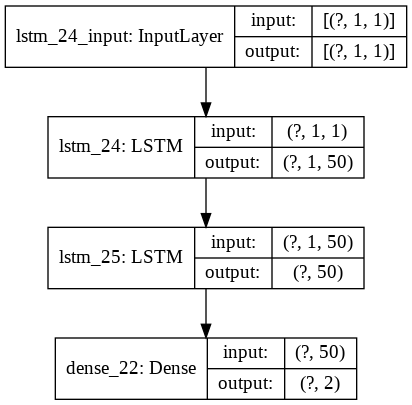

In [16]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=3,verbose=0)

test_output = model.predict(test_input, verbose=0)
print(test_output)

Solution via Bidirectional LSTM

The following script trains a bidirectional LSTM on our data and then makes a prediction on the test set.

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 100)               20800     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 202       
Total params: 21,002
Trainable params: 21,002
Non-trainable params: 0
_________________________________________________________________
None


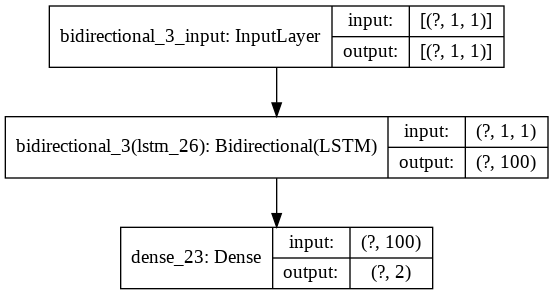

In [17]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, 1)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:

history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)
test_output = model.predict(test_input, verbose=0)
print(test_output)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 100)               20800     
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 202       
Total params: 21,002
Trainable params: 21,002
Non-trainable params: 0
_________________________________________________________________
None
[[10.978929 11.97964 ]]


### One-to-Many Sequence Problems with Multiple Features

In [ ]:
nums = 25

X1 = list()
X2 = list()
X = list()
Y = list()

X1 = [(x+1)*2 for x in range(25)]
X2 = [(x+1)*3 for x in range(25)]

for x1, x2 in zip(X1, X2):
    output_vector = list()
    output_vector.append(x1+1)
    output_vector.append(x2+1)
    Y.append(output_vector)

X = np.column_stack((X1, X2))
print(X.shape)
print(X[:3])

(25, 2)
[[2 3]
 [4 6]
 [6 9]]


In [ ]:
Y[:3]

[[3, 4], [5, 7], [7, 10]]

In [ ]:
X = np.array(X).reshape(25, 1, 2)
Y = np.array(Y)
print(X.shape)
print(Y.shape)
print(X[:3])
print(Y[:3])

(25, 1, 2)
(25, 2)
[[[2 3]]

 [[4 6]]

 [[6 9]]]
[[ 3  4]
 [ 5  7]
 [ 7 10]]


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 50)                10600     
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 102       
Total params: 10,702
Trainable params: 10,702
Non-trainable params: 0
_________________________________________________________________
None


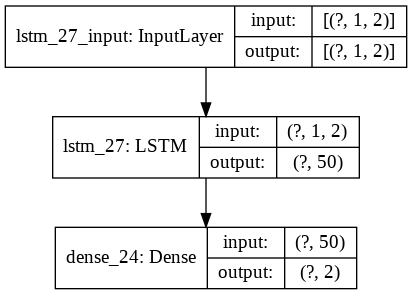

In [18]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 2))) # 1 timestep, 2 features
model.add(Dense(2)) # output 2 timesteps
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:

model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=3,verbose=0)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 50)                10600     
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 102       
Total params: 10,702
Trainable params: 10,702
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
test_input = array([40, 60])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[40.902065 60.90791 ]]


The input is [40, 60], the output should be [41, 61]. The output predicted by our simple LSTM is [40.946873 60.941723] which is very close to the expected output.



Solution via Stacked LSTM

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 1, 50)             10600     
_________________________________________________________________
lstm_29 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 102       
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________
None


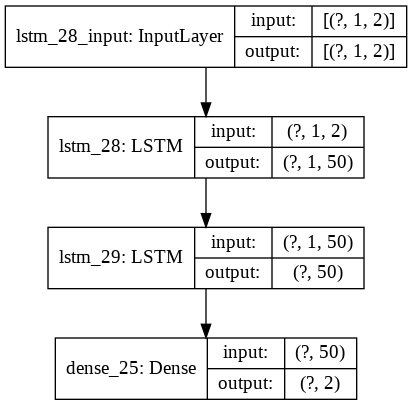

In [19]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 2)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:

history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)

test_input = array([40, 60])
test_input = test_input.reshape((1, 1, 2))
test_output = model.predict(test_input, verbose=0)
print(test_output)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 1, 50)             10600     
_________________________________________________________________
lstm_36 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_33 (Dense)             (None, 2)                 102       
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________
None
[[41.18624  61.290237]]


Solution via Bidirectional LSTM

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 100)               21200     
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 202       
Total params: 21,402
Trainable params: 21,402
Non-trainable params: 0
_________________________________________________________________
None


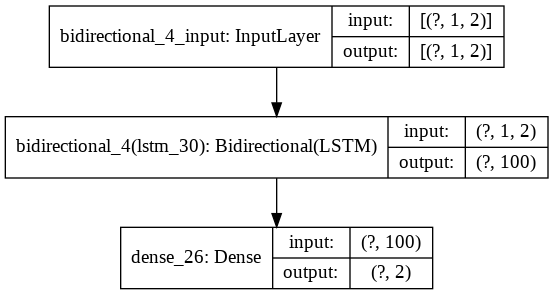

In [20]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:


history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)
test_output = model.predict(test_input, verbose=0)
print(test_output)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 100)               21200     
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 202       
Total params: 21,402
Trainable params: 21,402
Non-trainable params: 0
_________________________________________________________________
None
[[41.039974 61.042816]]


## Many-to-Many Sequence Problems

In one-to-many and many-to-one sequence problems, we saw that the output vector can contain multiple values. Depending upon the problem, an output vector containing multiple values can be considered as having single (since the output contains one time-step data in strict terms) or multiple (since one vector contains multiple values) outputs.

However, in some sequence problems, we want multiple outputs divided over time-steps. In other words, for each time-step in the input, we want a corresponding time-step in the output. Such models can be used to solve many-to-many sequence problems with variable lengths.

Encoder-Decoder Model

To solve such sequence problems, the encoder-decoder model has been designed. The encoder-decoder model is basically a fancy name for neural network architecture with two LSTM layers.

The first layer works as an encoder layer and encodes the input sequence. The decoder is also an LSTM layer, which accepts three inputs: the encoded sequence from the encoder LSTM, the previous hidden state, and the current input. During training the actual output at each time-step is used to train the encoder-decoder model. While making predictions, the encoder output, the current hidden state, and the previous output is used as input to make prediction at each time-step. These concepts will become more understandable when you will see them in action in an upcoming section.

### Many-to-Many Sequence Problems with Single Feature

In this section we will solve many-to-many sequence problems via the encoder-decoder model, where each time-step in the input sample will contain one feature.

In [ ]:
X = list()
Y = list()
X = [x for x in range(5, 301, 5)]
Y = [y for y in range(20, 316, 5)]

X = np.array(X).reshape(20, 3, 1)
Y = np.array(Y).reshape(20, 3, 1)
print(X.shape)
print(Y.shape)
print('X\n',X[:2])
print('Y\n',Y[:2])

(20, 3, 1)
(20, 3, 1)
X
 [[[ 5]
  [10]
  [15]]

 [[20]
  [25]
  [30]]]
Y
 [[[20]
  [25]
  [30]]

 [[35]
  [40]
  [45]]]


Solution via Stacked LSTM

The following script creates the encoder-decoder model using stacked LSTMs:

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 100)               40800     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 3, 100)            0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 3, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


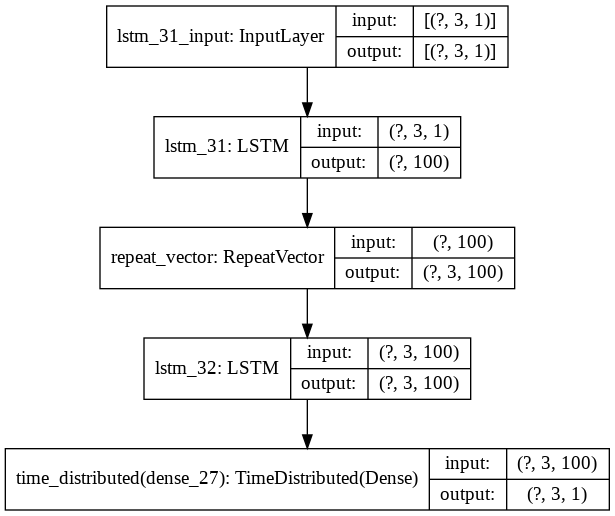

In [21]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
model = Sequential()
# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(3, 1))) # 3 timesteps, 1 features
# repeat vector
model.add(RepeatVector(3)) # output: 3 timesteps, 100 features
# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=True)) #output: 3 timesteps,100 features
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In the above script, the first LSTM layer is the encoder layer.

Next, we have added the repeat vector to our model. The repeat vector takes the output from encoder and feeds it repeatedly as input at each time-step to the decoder. For instance, in the output we have three time-steps. To predict each output time-step, the decoder will use the value from the repeat vector, the hidden state from the previous output and the current input.

Next we have a decoder layer. Since the output is in the form of a time-step, which is a 3D format, the return_sequences for the decoder model has been set True. The TimeDistributed layer is used to individually predict the output for each time-step.

You can see that the repeat vector only repeats the encoder output and has no parameters to train.

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)

In [ ]:
test_input = array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[316.83307]
  [324.21442]
  [331.0346 ]]]


Our input sequence contains three time-step values 300, 305 and 310. The output should be next three multiples of 5 i.e. 315, 320 and 325. I received the following output:

No TimeDistributed layer

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 100)               40800     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 3, 100)            0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
dense_28 (Dense)             (None, 3, 1)              101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


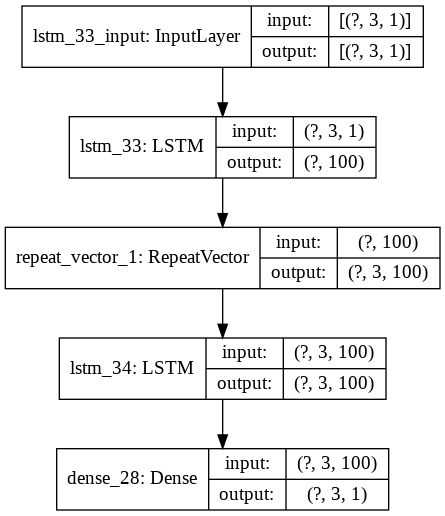

In [22]:
model = Sequential()

# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))
# repeat vector
model.add(RepeatVector(3))
# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=True))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)
test_input = array([300, 305, 310])
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[317.36978]
  [323.65762]
  [329.4702 ]]]


No repeate vector

In [23]:
model = Sequential()

# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(3, 1)))
# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=True))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

ValueError: ignored

Solution via Bidirectional LSTM

Let's now create encoder-decoder model with bidirectional LSTMs and see if we can get better results:

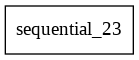

In [25]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(3, 1))))
model.add(RepeatVector(3))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
#print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
print(model.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_10 (Bidirectio (None, 200)               81600     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 3, 200)            0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 3, 200)            240800    
_________________________________________________________________
time_distributed_4 (TimeDist (None, 3, 1)              201       
Total params: 322,601
Trainable params: 322,601
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[316.43747]
  [321.91577]
  [327.30347]]]


Our input sequence contains three time-step values 300, 305 and 310. The output should be next three multiples of 5 i.e. 315, 320 and 325. I received the following output:

## Many-to-Many Sequence Problems with Multiple Features

As you might have guessed it by now, in many-to-many sequence problems, each time-step in the input sample contains multiple features.

In [ ]:
X = list()
Y = list()
X1 = [x1 for x1 in range(5, 301, 5)]
X2 = [x2 for x2 in range(20, 316, 5)]
Y = [y for y in range(35, 331, 5)]

X = np.column_stack((X1, X2))
X = np.array(X).reshape(20, 3, 2)
Y = np.array(Y).reshape(20, 3, 1)
print(X.shape)
print(Y.shape)
print('X\n',X[:2])
print('Y\n',Y[:2])

(20, 3, 2)
(20, 3, 1)
X
 [[[ 5 20]
  [10 25]
  [15 30]]

 [[20 35]
  [25 40]
  [30 45]]]
Y
 [[[35]
  [40]
  [45]]

 [[50]
  [55]
  [60]]]


Solution via Stacked LSTM

The following script trains the stacked LSTM model. You can see that the input shape is now (3, 2) corresponding to three time-steps and two features in the input.

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 100)               41200     
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 3, 100)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 3, 1)              101       
Total params: 121,701
Trainable params: 121,701
Non-trainable params: 0
_________________________________________________________________


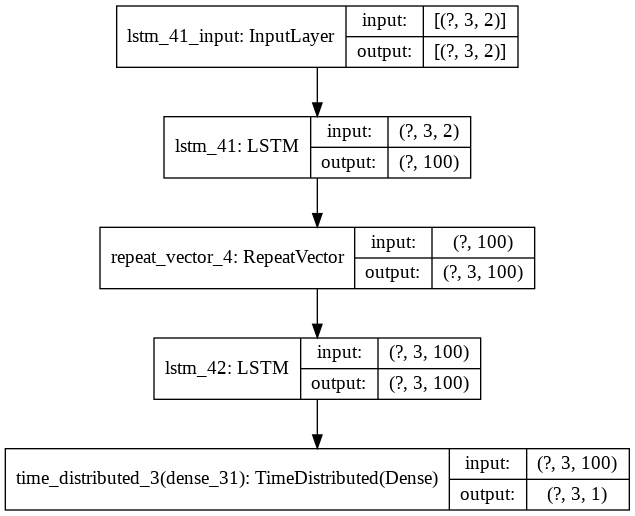

In [26]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(3, 2)))
model.add(RepeatVector(3))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)

In [ ]:

X1 = [300, 305, 310]
X2 = [315, 320, 325]

test_input = np.column_stack((X1, X2))

test_input = test_input.reshape((1, 3, 2))
print(test_input)

[[[300 315]
  [305 320]
  [310 325]]]


The actual output of the above test point is [330, 335, 340]. Let's see what are model predicts:

In [ ]:
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[331.67352]
  [336.8939 ]
  [342.40213]]]


Solution via Bidirectional LSTM

Let's now train encoder-decoder model based on bidirectional LSTMs and see if we can get improved results. The following script trains the model.

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

model = Sequential()
model.add(Bidirectional(LSTM(100, activation='relu', input_shape=(3, 2))))
model.add(RepeatVector(3))
model.add(Bidirectional(LSTM(100, activation='relu', return_sequences=True)))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 100)               41200     
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 3, 100)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 3, 100)            80400     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 3, 1)              101       
Total params: 121,701
Trainable params: 121,701
Non-trainable params: 0
_________________________________________________________________
None


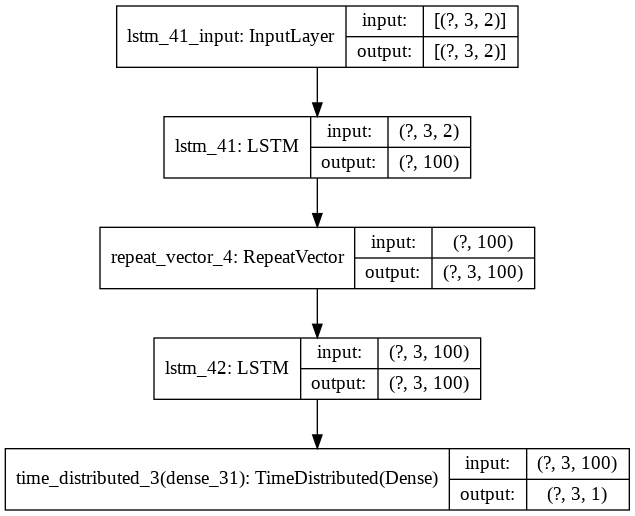

In [27]:
print(model.summary())
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X, Y, epochs=1000, validation_split=0.2, verbose=0, batch_size=3)
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[331.3151 ]
  [336.86588]
  [342.24356]]]


# Compare timedistributed and non timedistributed

In [ ]:
model = Sequential()

# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(3, 2))) # 3 timesteps, 1 features
# repeat vector
model.add(RepeatVector(3)) # output: 3 timesteps, 100 features
# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=False)) #output: 3 timesteps,100 features
# Note: must return sequences = True to let timedistributed action
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

AssertionError: ignored

In [ ]:
model = Sequential()

# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(3, 2))) # 3 timesteps, 1 features
# repeat vector
model.add(RepeatVector(3)) # output: 3 timesteps, 100 features
# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=False)) #output: 3 timesteps,100 features

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 100)               41200     
_________________________________________________________________
repeat_vector_15 (RepeatVect (None, 3, 100)            0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 101       
Total params: 121,701
Trainable params: 121,701
Non-trainable params: 0
_________________________________________________________________
None
